In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
from sklearn.svm import SVR,SVC
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [98]:
data=pd.read_csv('car-mpg (1).csv')
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [99]:
data.tail()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
393,27.0,4,140.0,86,2790,15.6,82,1,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,1,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,1,chevy s-10


In [100]:
data.sample(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
237,30.5,4,98.0,63,2051,17.0,77,1,1,chevrolet chevette
223,15.5,8,318.0,145,4140,13.7,77,1,0,dodge monaco brougham
341,23.5,6,173.0,110,2725,12.6,81,1,0,chevrolet citation
268,27.2,4,119.0,97,2300,14.7,78,3,1,datsun 510
241,22.0,6,146.0,97,2815,14.5,77,3,0,datsun 810


In [101]:
data['origin']=data['origin'].astype('category')
data['car_type']=data['car_type'].astype('category')

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   mpg       398 non-null    float64 
 1   cyl       398 non-null    int64   
 2   disp      398 non-null    float64 
 3   hp        398 non-null    object  
 4   wt        398 non-null    int64   
 5   acc       398 non-null    float64 
 6   yr        398 non-null    int64   
 7   origin    398 non-null    category
 8   car_type  398 non-null    category
 9   car_name  398 non-null    object  
dtypes: category(2), float64(3), int64(3), object(2)
memory usage: 26.0+ KB


In [103]:
data.isna().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
car_name    0
dtype: int64

In [104]:
data['hp']=data['hp'].replace('?',np.nan)
data['hp']=data['hp'].fillna(data['hp'].median())
data['hp']=data['hp'].astype('int64')

In [105]:
data.drop('car_name',axis=1,inplace=True)

In [106]:
Data=pd.get_dummies(data,columns=['car_type'])

In [107]:
num_cols=Data.select_dtypes(include=['int64','float64']).columns

In [108]:
Data[num_cols]=Data[num_cols].apply(zscore)

In [109]:
x=Data.drop('mpg',1)
y=Data[['mpg']]

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [111]:
from sklearn import metrics
svm=SVR()
svm.fit(x_train,y_train)
yhat_svm=svm.predict(x_test)
print(metrics.r2_score(y_test,yhat_svm))

0.8904256555664131


E:\Anacondafiles\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


E:\Anacondafiles\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg'>

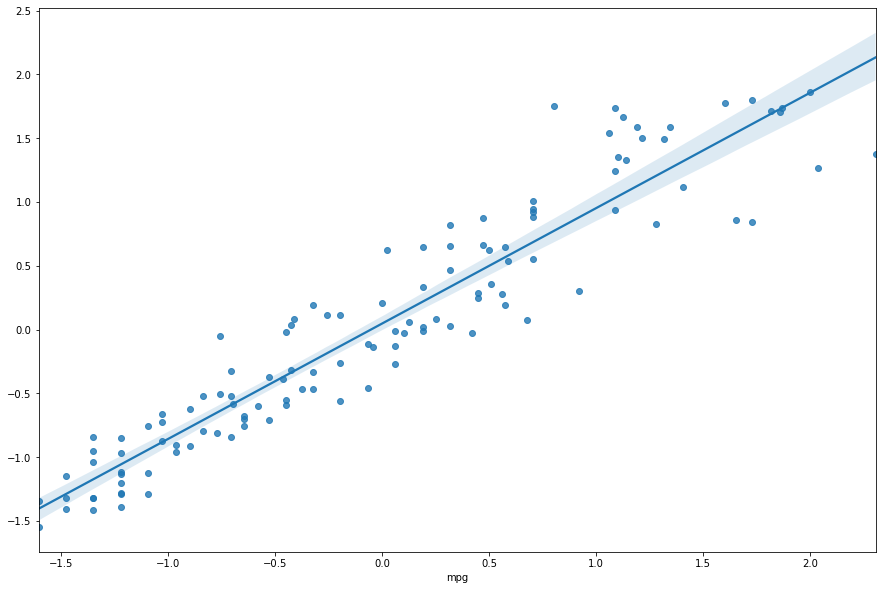

In [112]:
plt.figure(figsize=(15,10))
sns.regplot(y_test,yhat_svm)

In [113]:
import statsmodels.api as  sm

In [114]:
X=sm.add_constant(x)
result=sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     255.3
Date:                Fri, 19 Nov 2021   Prob (F-statistic):          1.14e-149
Time:                        22:08:41   Log-Likelihood:                -200.01
No. Observations:                 398   AIC:                             418.0
Df Residuals:                     389   BIC:                             453.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1736      0.038     -4.607      0.000      -0.248      -0.100
cyl            0.2733      0.085      3.206      0.001       0.106       0.441
disp           0.2436      0.095      2.567      0.011       0.057       0.430
hp            -0.1613      0.064     -2.515      0.012      -0.287      -0.035
wt            -0.6788      0.066    -10.224      0.000      -0.809      -0.548
acc            0.0319      0.032      0.984      0.326      -0.032       0.096
yr             0.3483      0.023     15.371      0.000       0.304       0.393
origin         0.1517      0.034      4.493      0.000       0.085       0.218
car_type_0    -0.4496      0.055     -8.138      0.000      -0.558      -0.341
car_type_1     0.2760      0.058      4.783      0.000       0.163       0.389
==============================================================================
Omnibus:                       39.582   Durbin-Watson:                   1.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.713
Skew:                           0.609   Prob(JB):                     7.28e-16
Kurtosis:                       4.649   Cond. No.                     8.32e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.08e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [117]:
x1=x.drop('acc',1)

In [118]:
X=sm.add_constant(x1)
result=sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     291.7
Date:                Fri, 19 Nov 2021   Prob (F-statistic):          1.05e-150
Time:                        22:10:08   Log-Likelihood:                -200.50
No. Observations:                 398   AIC:                             417.0
Df Residuals:                     390   BIC:                             448.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1732      0.038     -4.598      0.000      -0.247      -0.099
cyl            0.2709      0.085      3.180      0.002       0.103       0.438
disp           0.2332      0.094      2.473      0.014       0.048       0.419
hp            -0.1986      0.052     -3.840      0.000      -0.300      -0.097
wt            -0.6483      0.059    -11.040      0.000      -0.764      -0.533
yr             0.3466      0.023     15.342      0.000       0.302       0.391
origin         0.1513      0.034      4.482      0.000       0.085       0.218
car_type_0    -0.4500      0.055     -8.147      0.000      -0.559      -0.341
car_type_1     0.2768      0.058      4.798      0.000       0.163       0.390
==============================================================================
Omnibus:                       43.738   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.622
Skew:                           0.648   Prob(JB):                     3.11e-18
Kurtosis:                       4.783   Cond. No.                     8.05e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.18e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

E:\Anacondafiles\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\Anacondafiles\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.8885228545827725


<AxesSubplot:xlabel='mpg'>

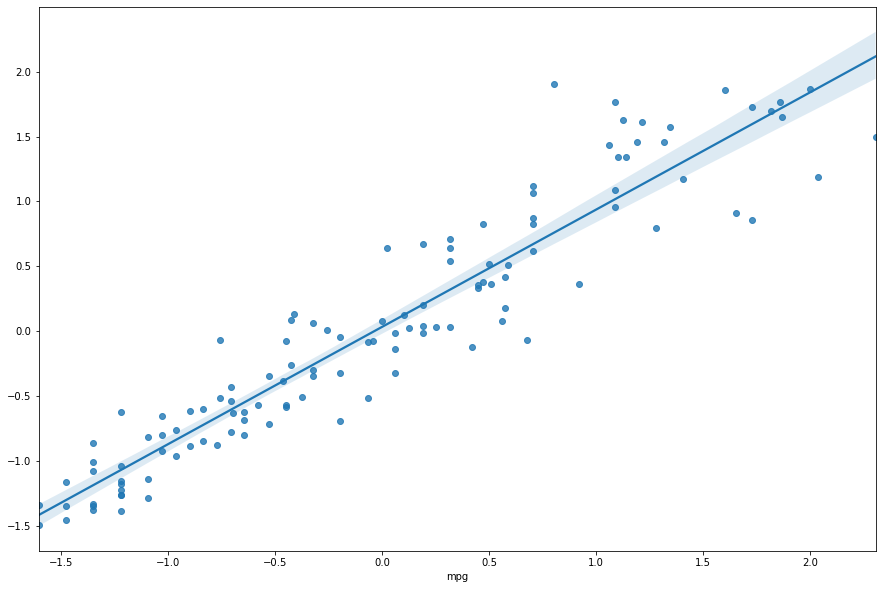

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=1,test_size=0.3)
svm=SVR()
svm.fit(x_train,y_train)
yhat_svm=svm.predict(x_test)
print(metrics.r2_score(y_test,yhat_svm))
plt.figure(figsize=(15,10))
sns.regplot(y_test,yhat_svm)

In [122]:
errors=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    errors.append(kmeans.inertia_)

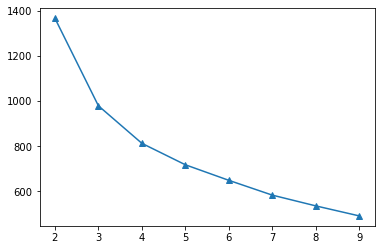

In [124]:
plt.plot(range(2,10),errors,marker='^')

In [125]:
x_kmeans=x.copy()

In [126]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(x)
labels=kmeans.labels_

In [127]:
x_kmeans['Group']=labels

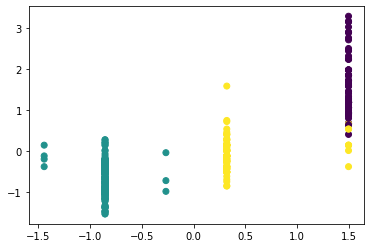

In [129]:
plt.scatter(x_kmeans['cyl'],x_kmeans['hp'],c=x_kmeans['Group'])

In [134]:
Data['Group']=labels

E:\Anacondafiles\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


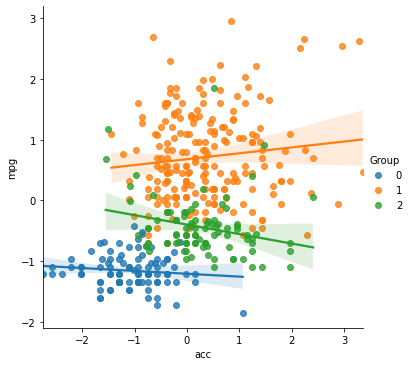

In [137]:
sns.lmplot('acc','mpg',data=Data,hue='Group')

#### PCA

In [141]:
from sklearn.decomposition import PCA

In [142]:
pca=PCA(6)
pca.fit(x)
pca.explained_variance_ratio_

array([0.67548834, 0.12574976, 0.10140791, 0.05082875, 0.02667963,
       0.0086581 ])

In [143]:
print('Eigen values : ',pca.explained_variance_)

Eigen values :  [4.83503891 0.9000969  0.72586181 0.36382417 0.19096857 0.0619733 ]


In [144]:
print('Eigen vectors :',pca.components_)

Eigen vectors : [[ 0.43375503  0.44453485  0.42652305  0.42341299 -0.28844364 -0.20852006
  -0.22276185  0.19588475 -0.19588475]
 [ 0.15831027  0.12682769 -0.10640801  0.23371829  0.44739745  0.76390467
  -0.2853845   0.11778487 -0.11778487]
 [ 0.05069888  0.02608036 -0.185697    0.09739571  0.71777014 -0.60558935
  -0.24058048  0.08052558 -0.08052558]
 [-0.17616029 -0.0752064  -0.16173618 -0.22652252 -0.31177656 -0.03644876
  -0.88441833 -0.05055487  0.05055487]
 [-0.4350819   0.01213455  0.51255353  0.37798689  0.18316581  0.02111952
  -0.12211871 -0.42193753  0.42193753]
 [ 0.2649235   0.101993    0.56062719 -0.72282967  0.26258051  0.0634946
  -0.06830541 -0.04990829  0.04990829]]


<BarContainer object of 6 artists>

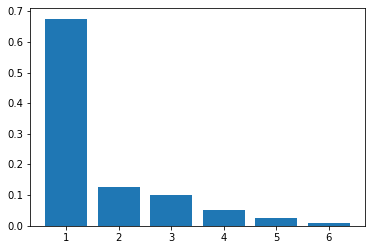

In [146]:
plt.bar(range(1,7),pca.explained_variance_ratio_)

In [147]:
pca=PCA(4)
pca.fit(x)
new_x=pca.fit_transform(x)

In [151]:
x_train,x_test,y_train,y_test=train_test_split(new_x,y,test_size=0.3,random_state=1)
svm.fit(x_train,y_train)
yhat=svm.predict(x_test)
metrics.r2_score(y_test,yhat)

E:\Anacondafiles\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8760770460400295

<AxesSubplot:xlabel='mpg'>

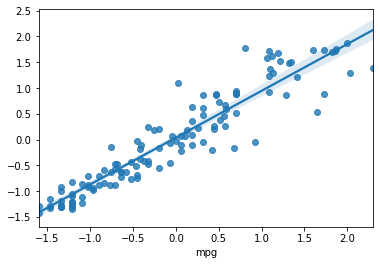

In [154]:
sns.regplot(y_test,yhat)